/cr/users/filip/Binaries/Classifier.py:897: RuntimeWarning: invalid value encountered in sqrt
  eff_err = 1/(n_hit + n_miss)**2 * np.sqrt( n_hit**3 + n_miss**3 - 2 * np.sqrt((n_hit * n_miss)**3) )


/cr/users/filip/Binaries/Classifier.py:680: RuntimeWarning: invalid value encountered in sqrt
  eff_err = 1/(n_hit + n_miss)**2 * np.sqrt( n_hit**3 + n_miss**3 - 2 * np.sqrt((n_hit * n_miss)**3) )


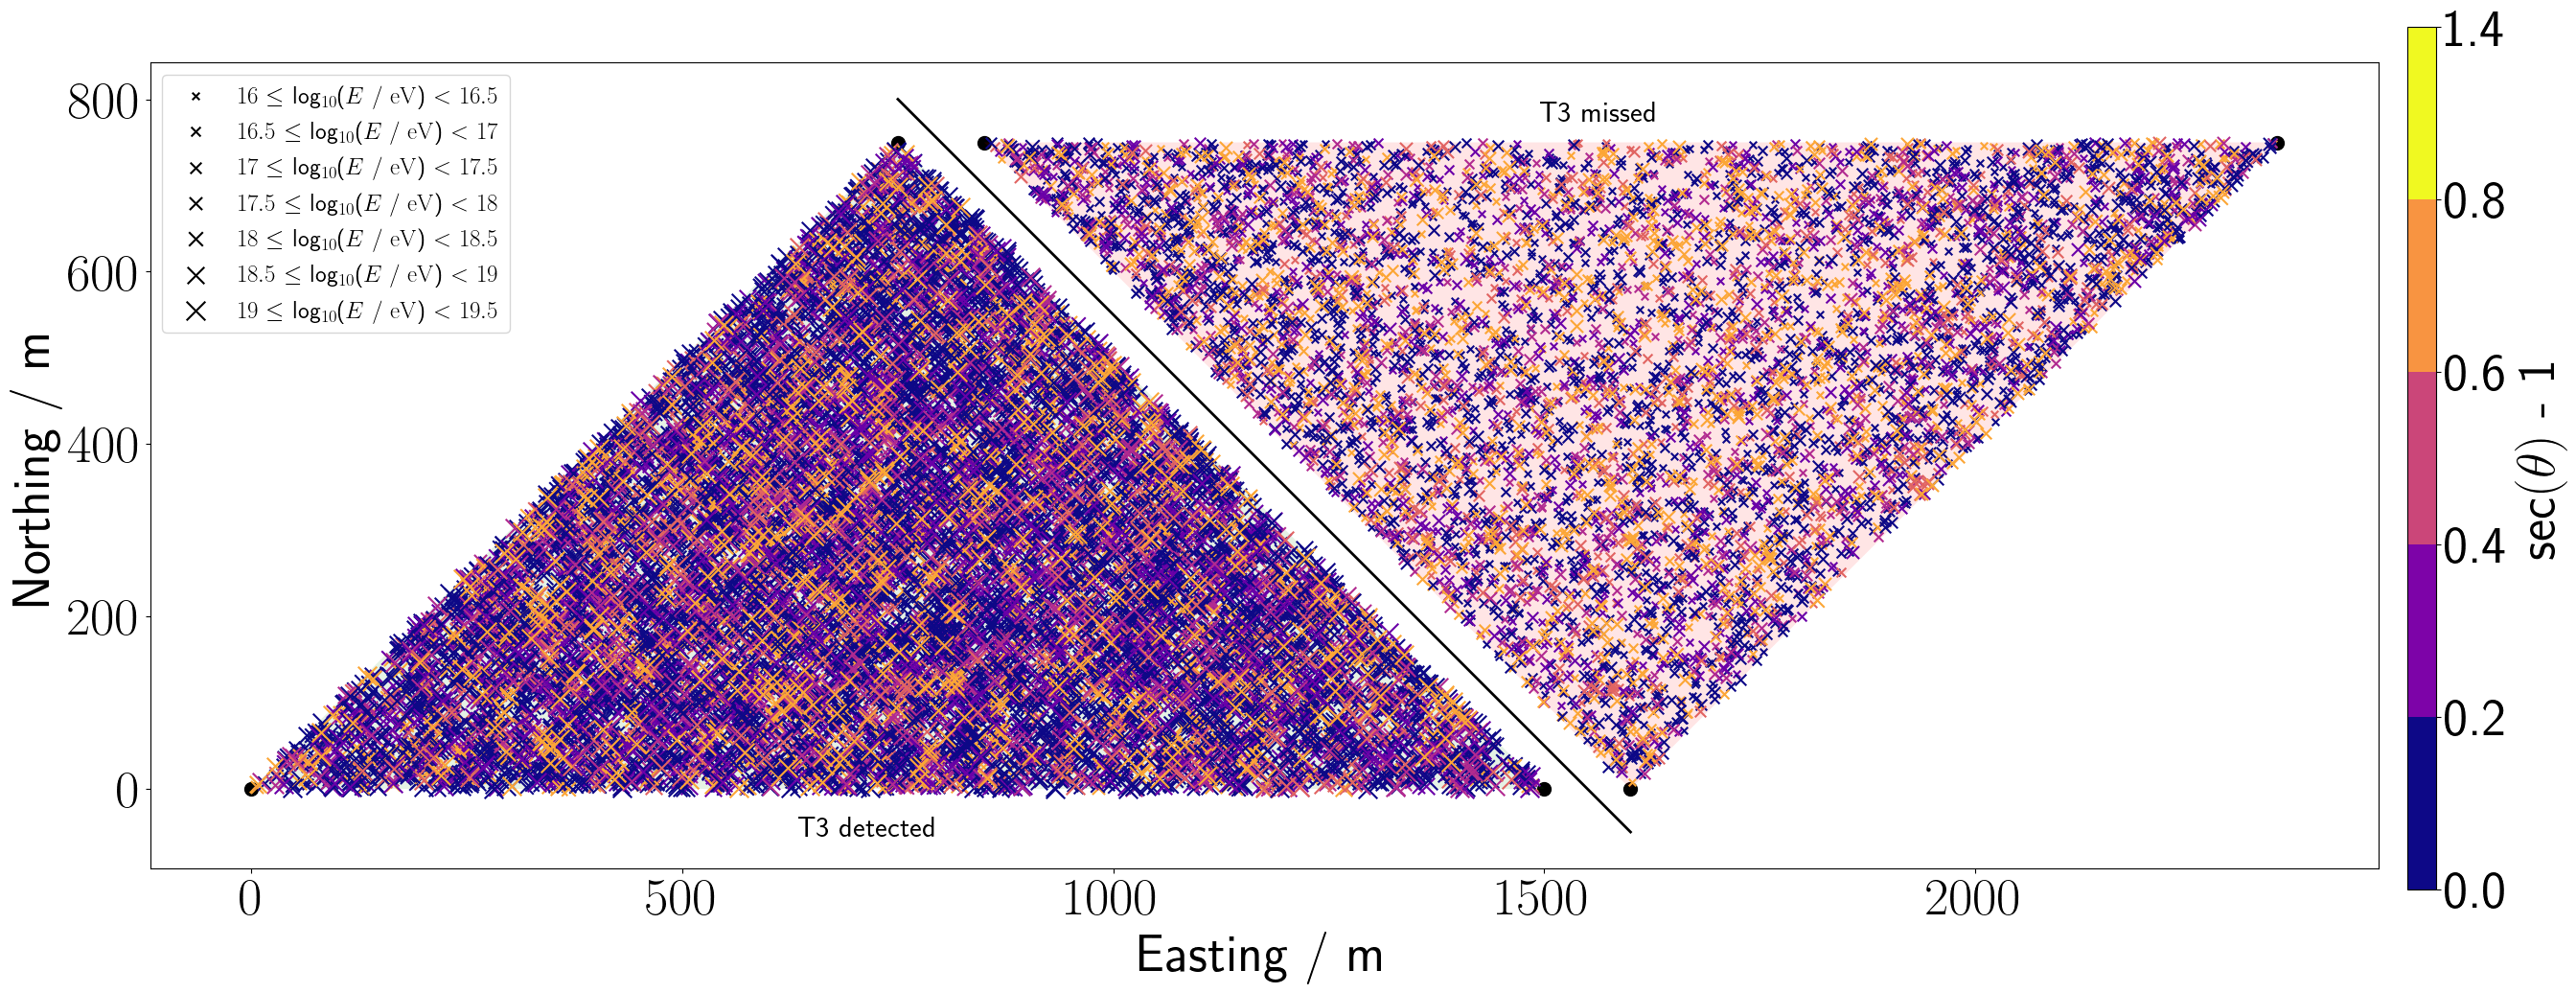

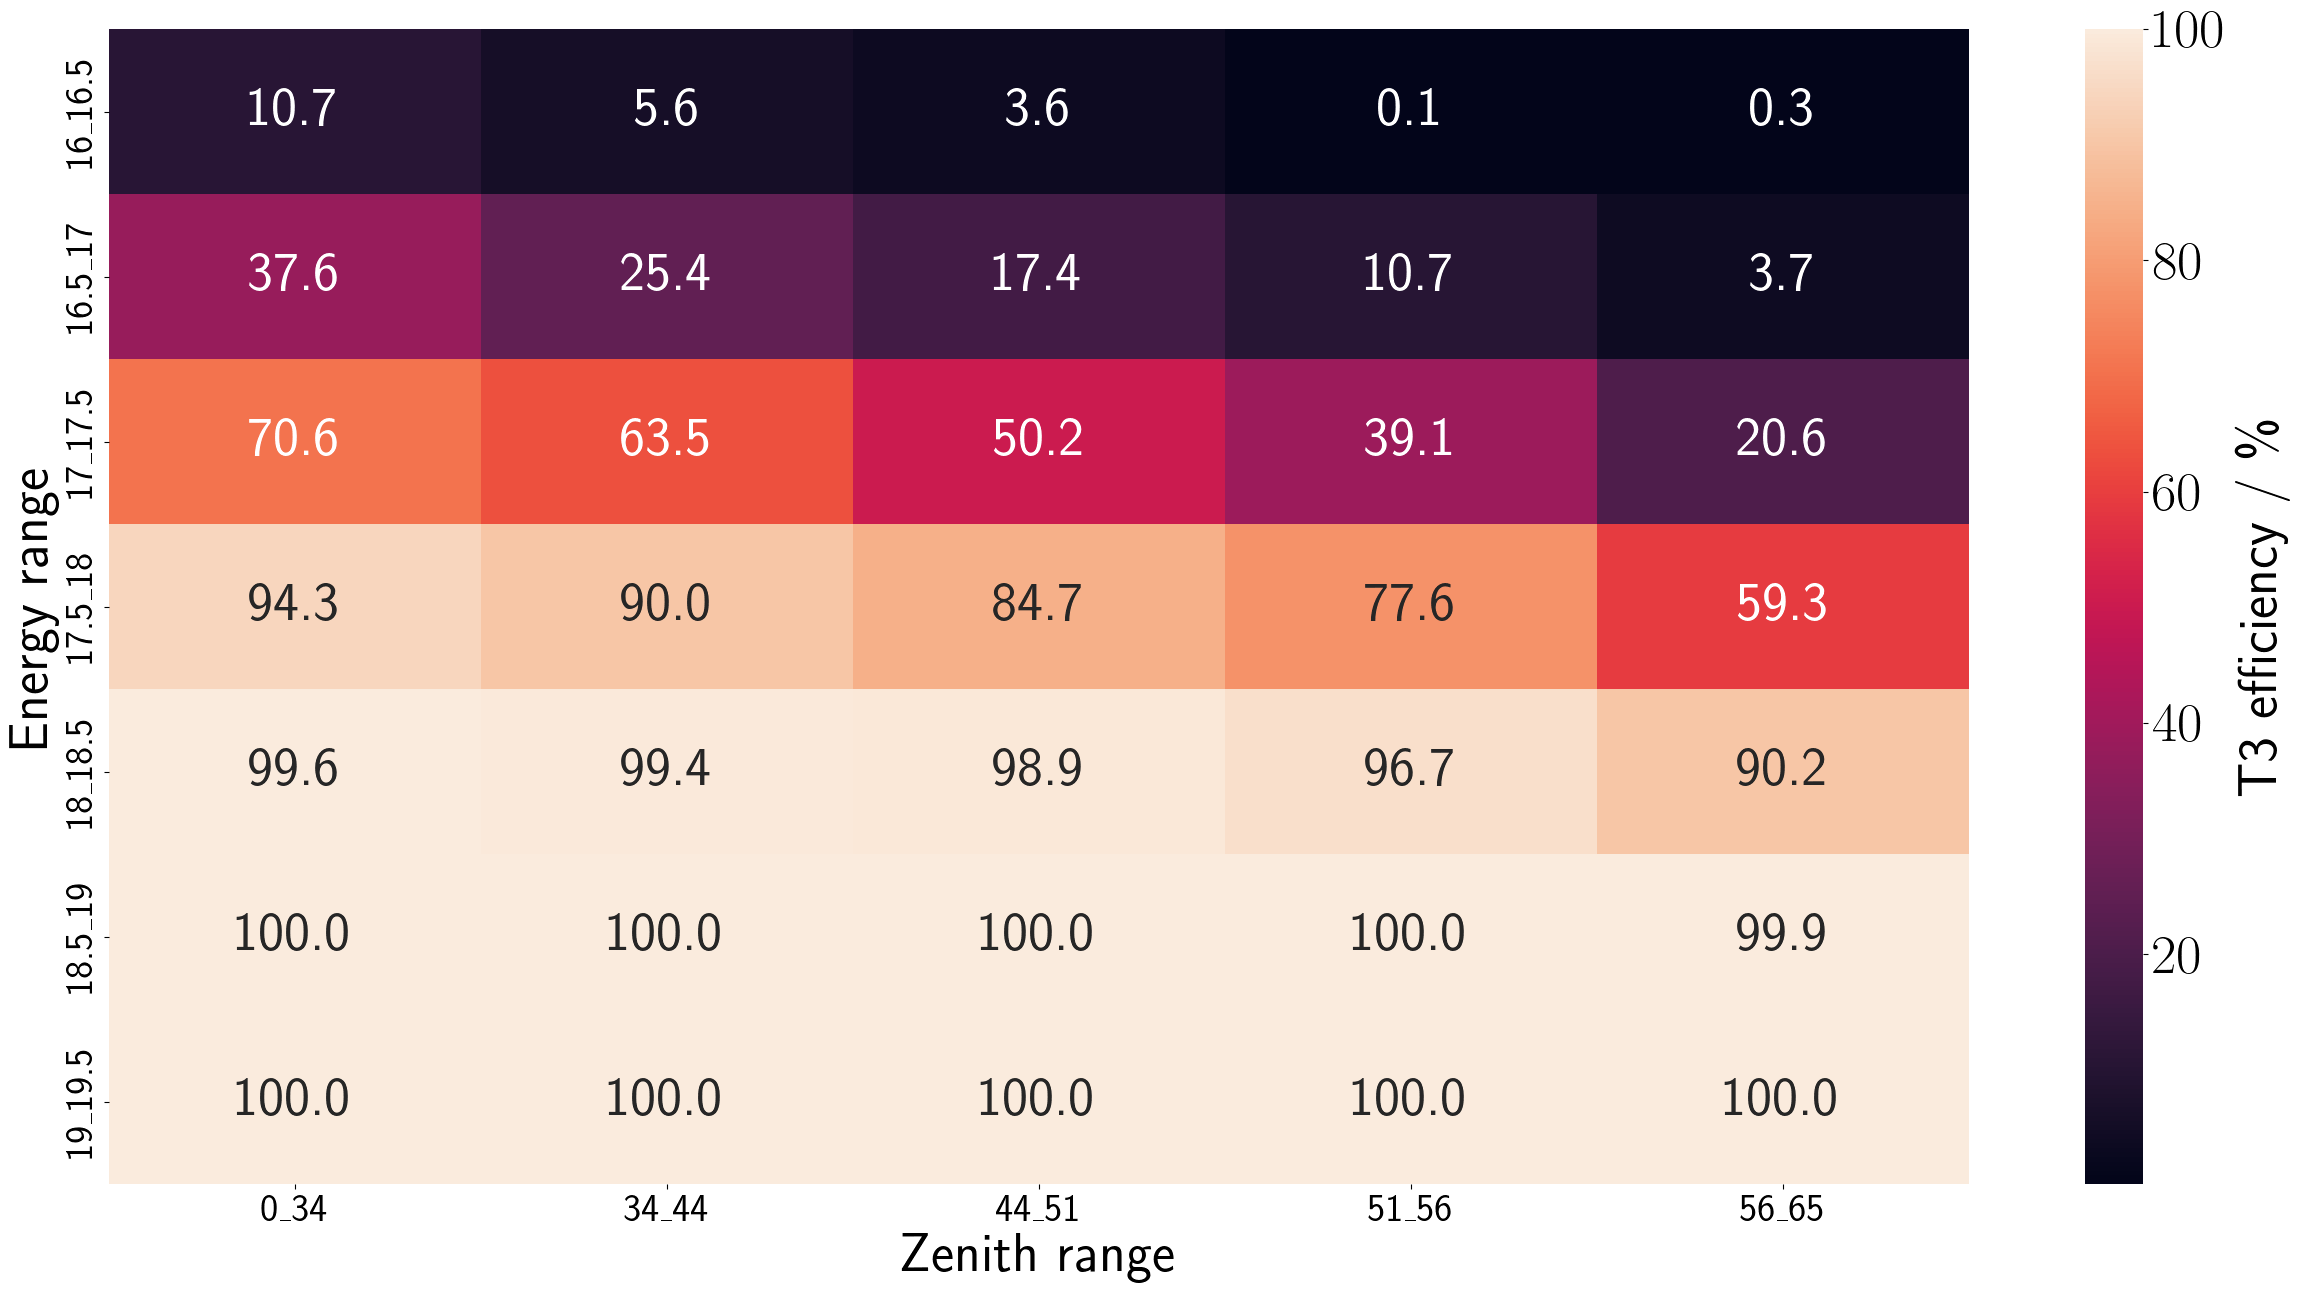

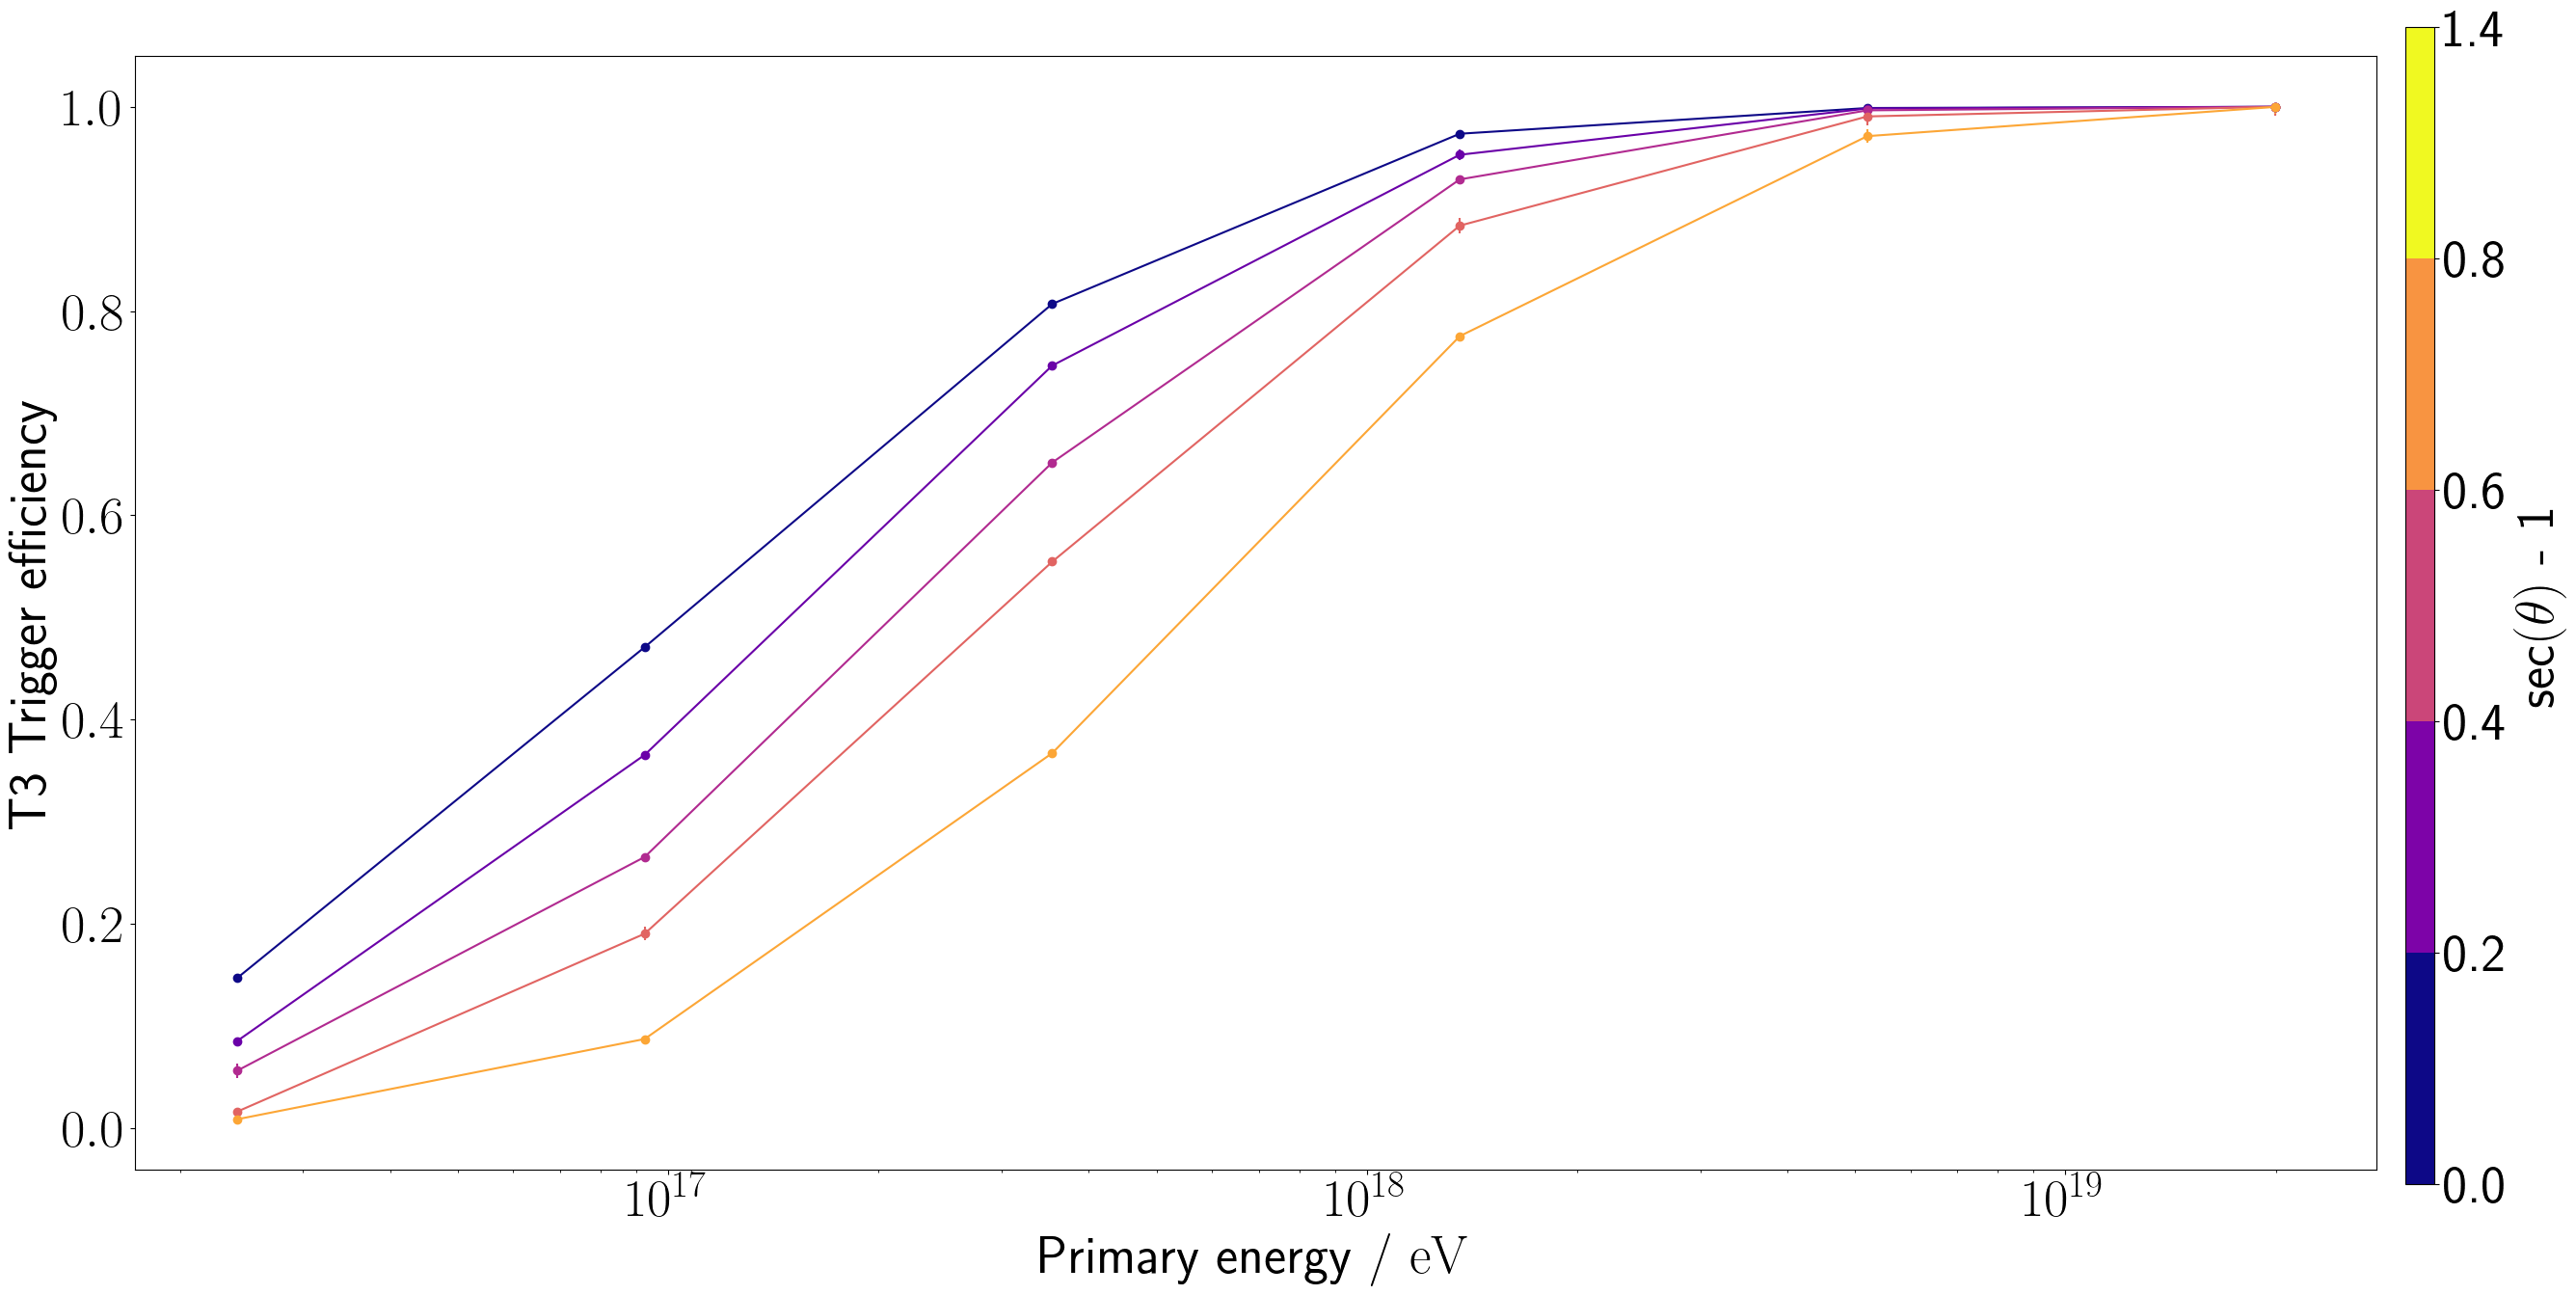

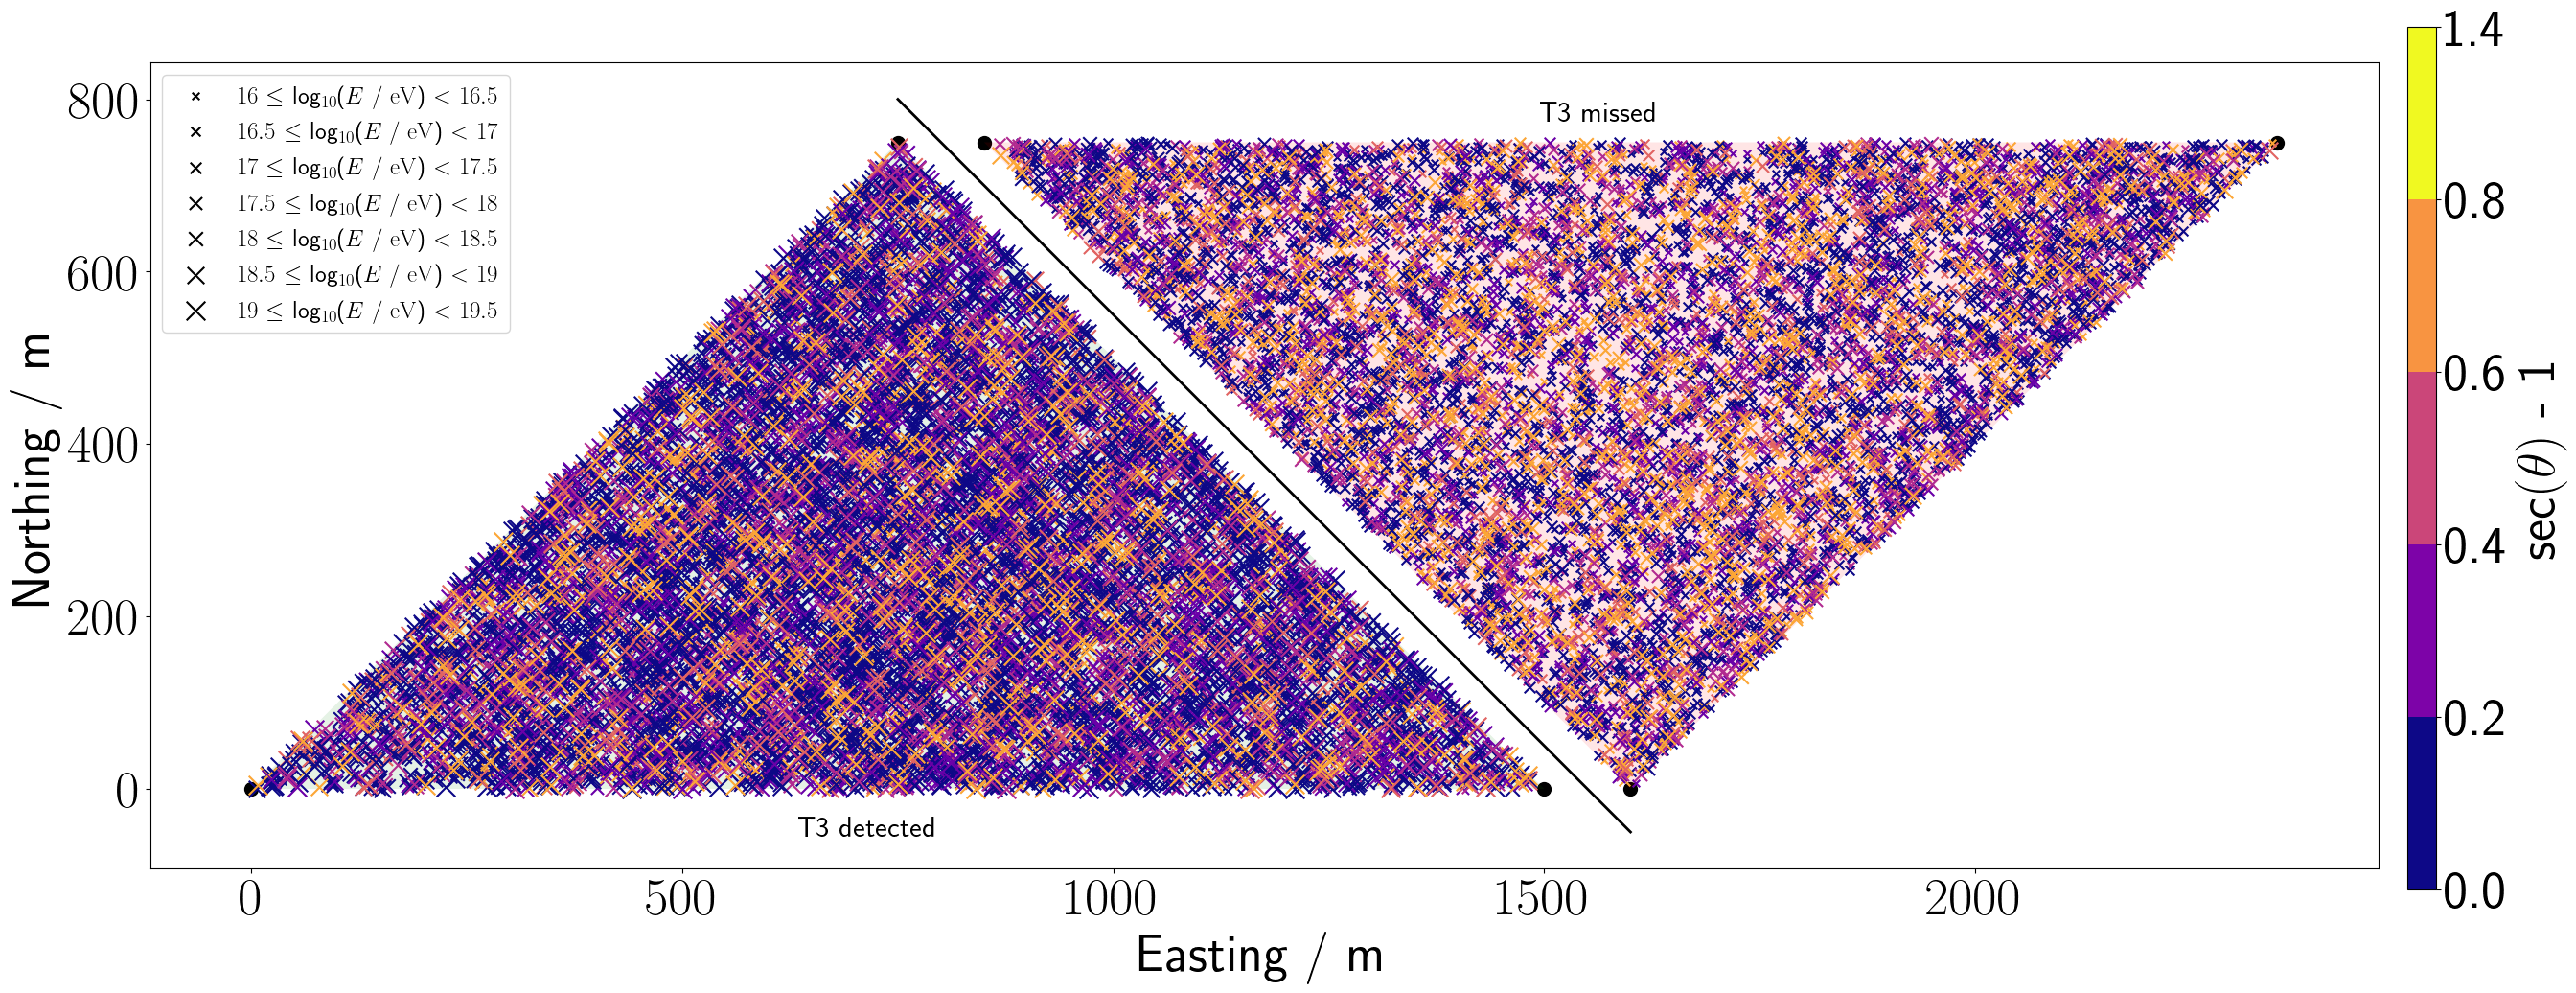

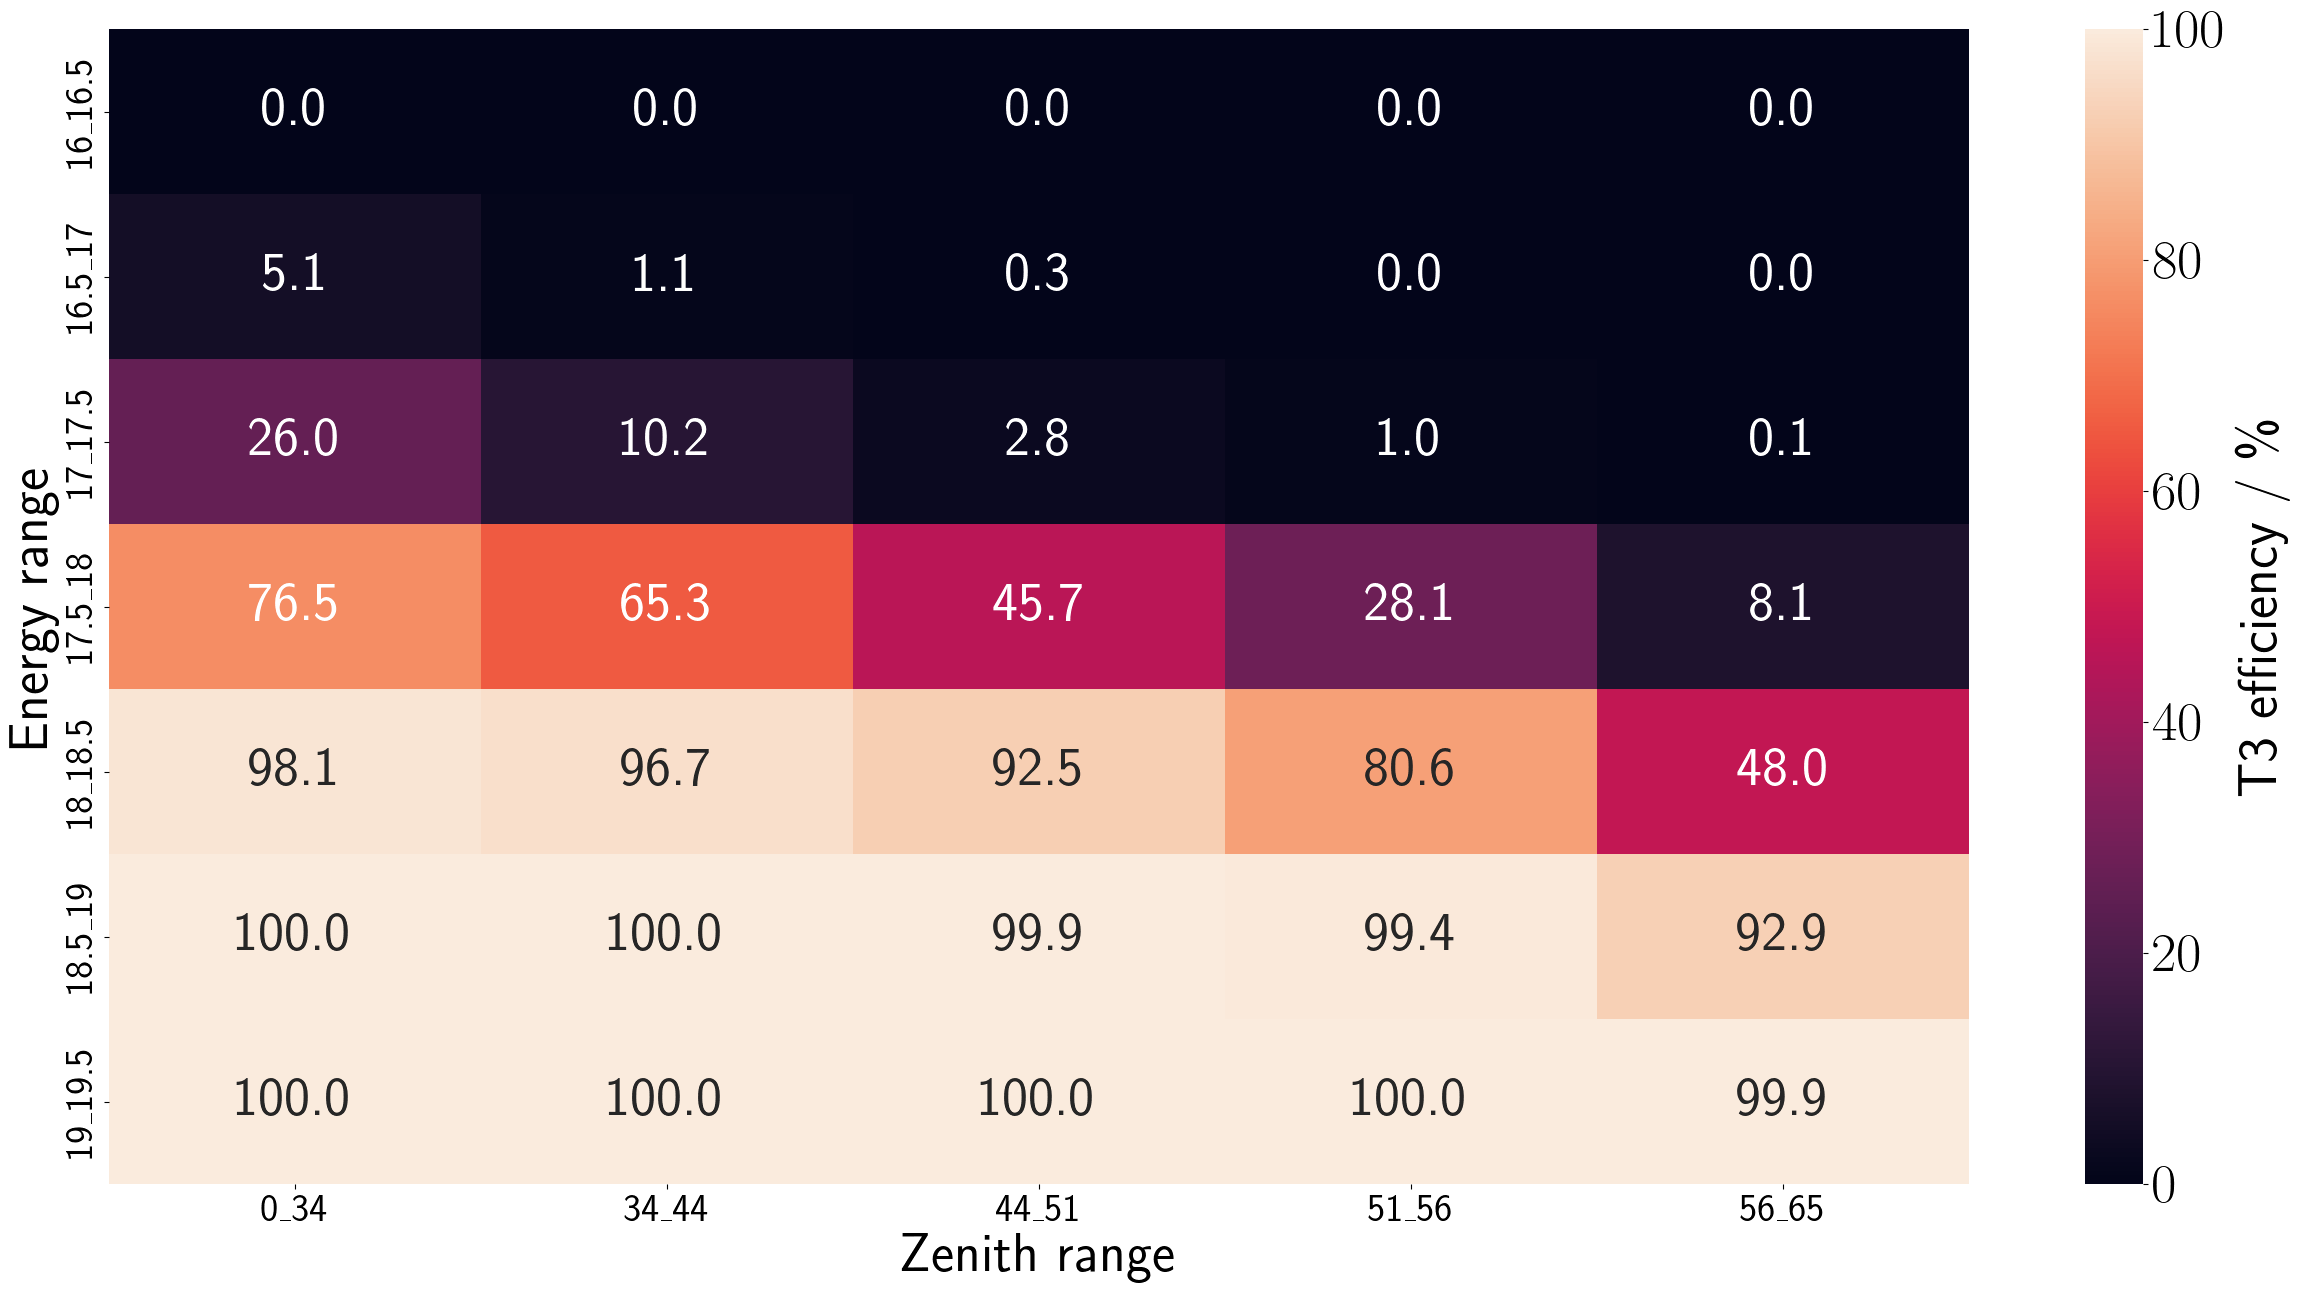

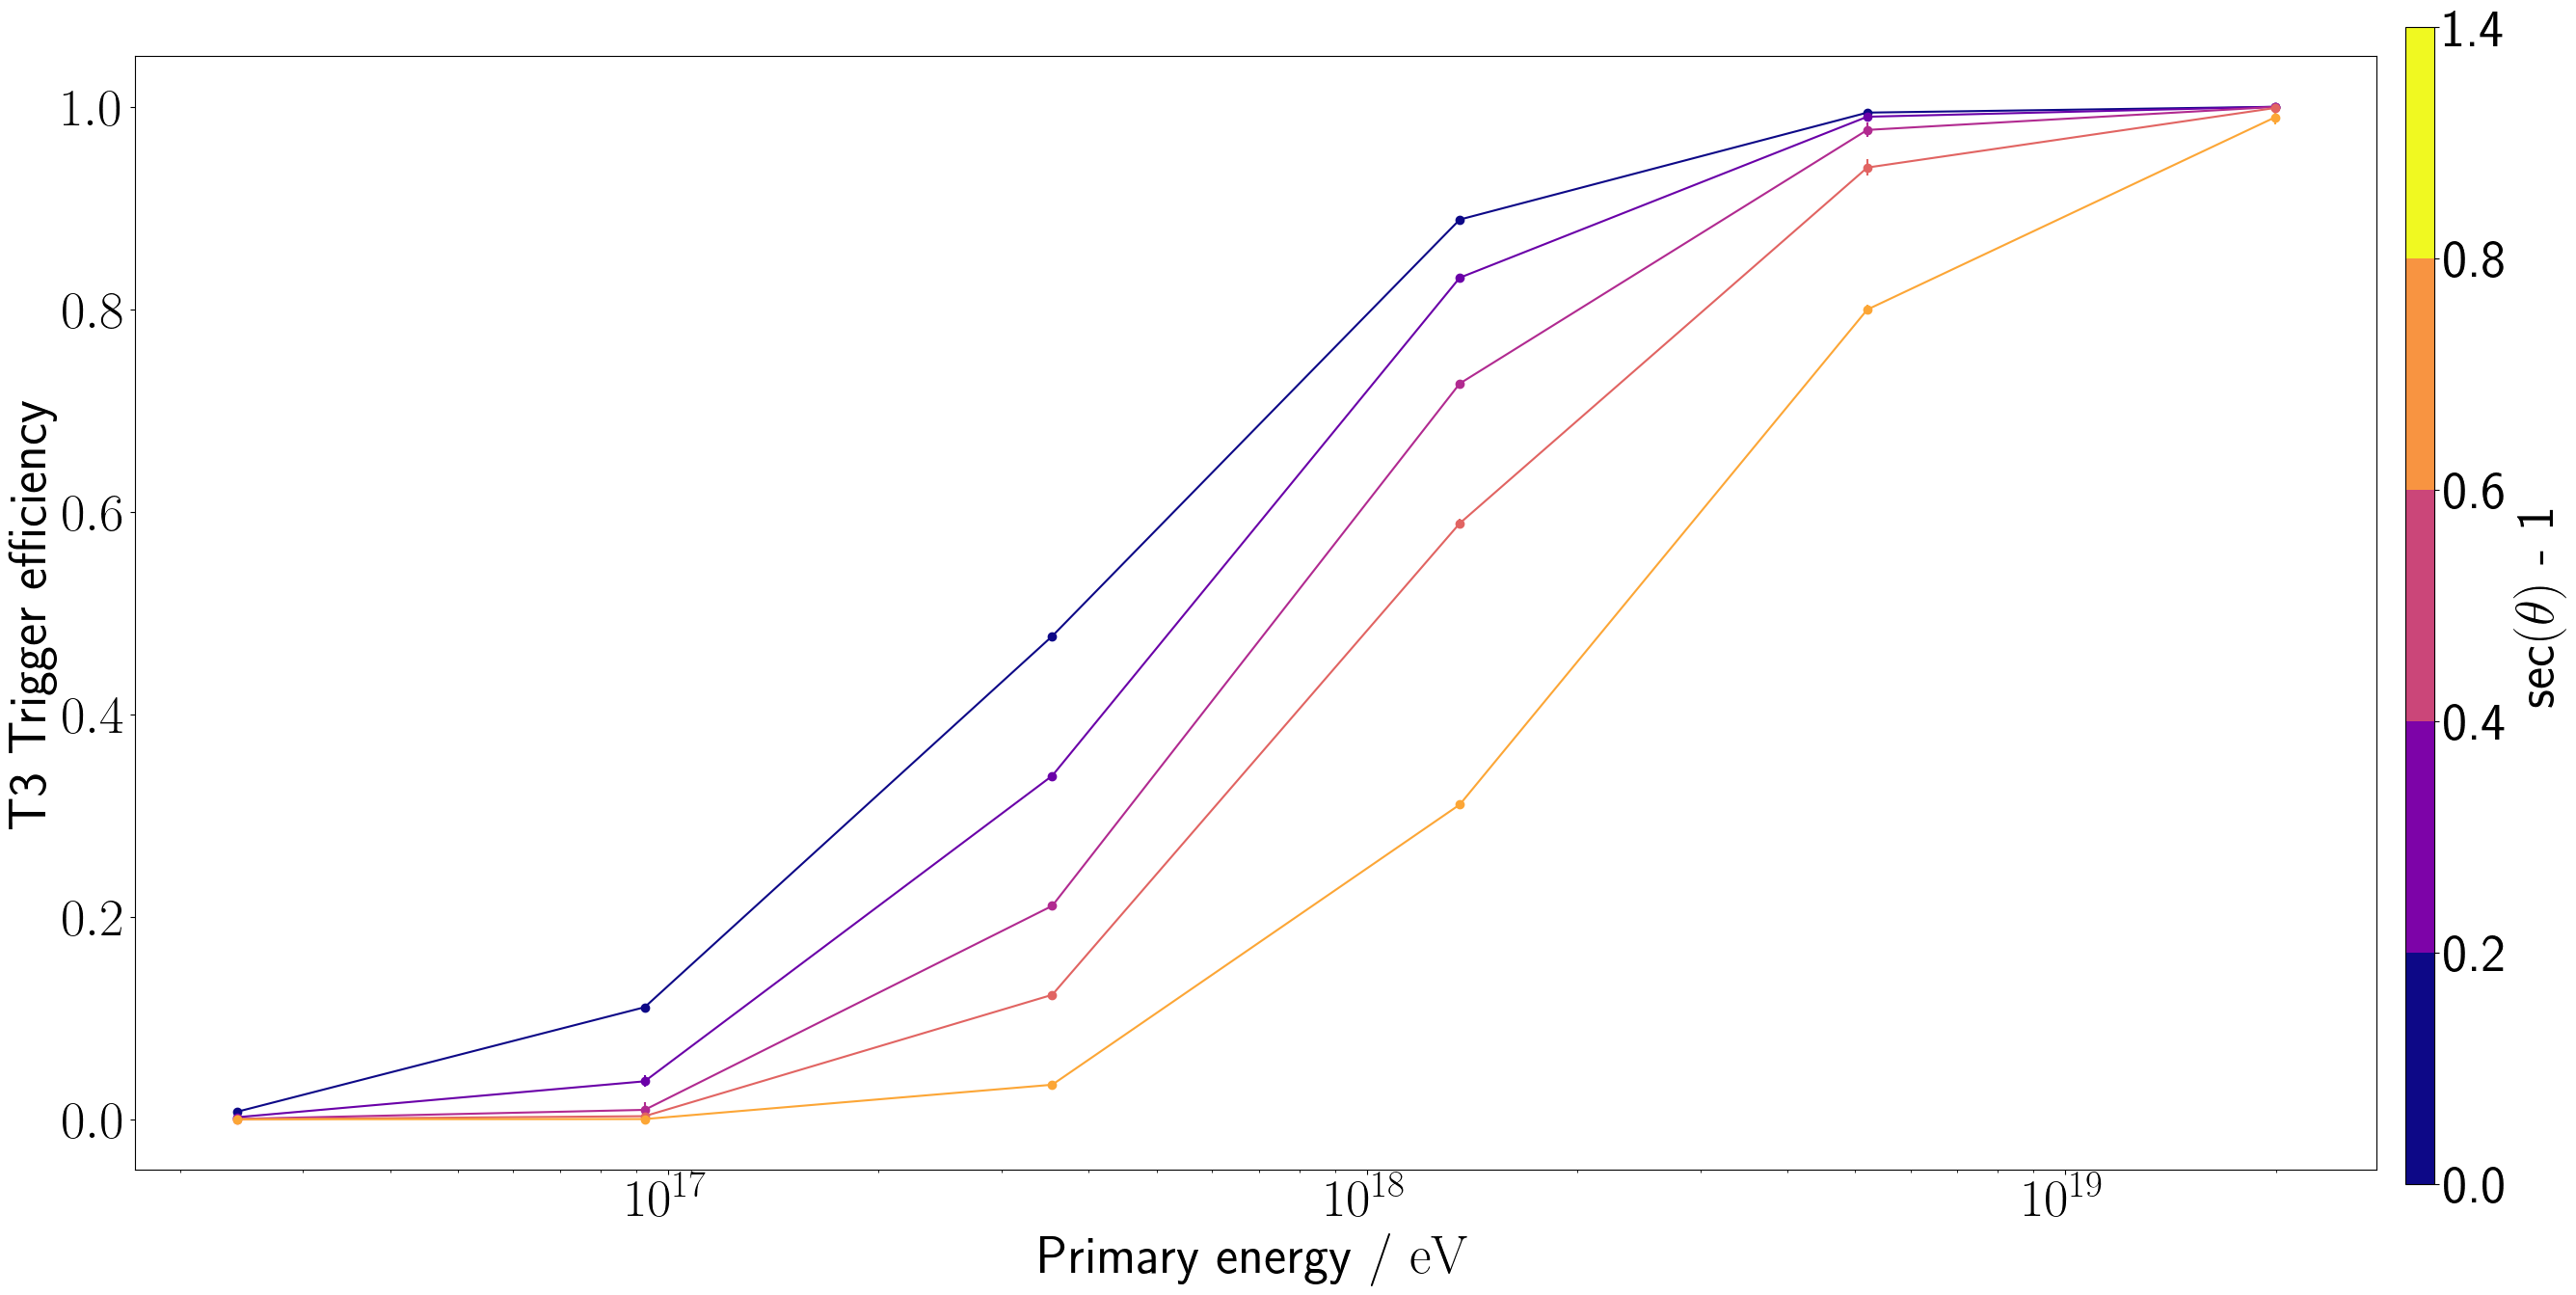

In [2]:
from Binaries import *

Mock = MockClassifier()
Trigger = HardwareClassifier()
bin_mock, eff_mock = Mock.do_t3_simulation(1e6)
bin_trig, eff_trig = Trigger.do_t3_simulation("final_all_triggers", 1e6)

/tmp/ipykernel_2226107/3482829888.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cmap.get_cmap("plasma")


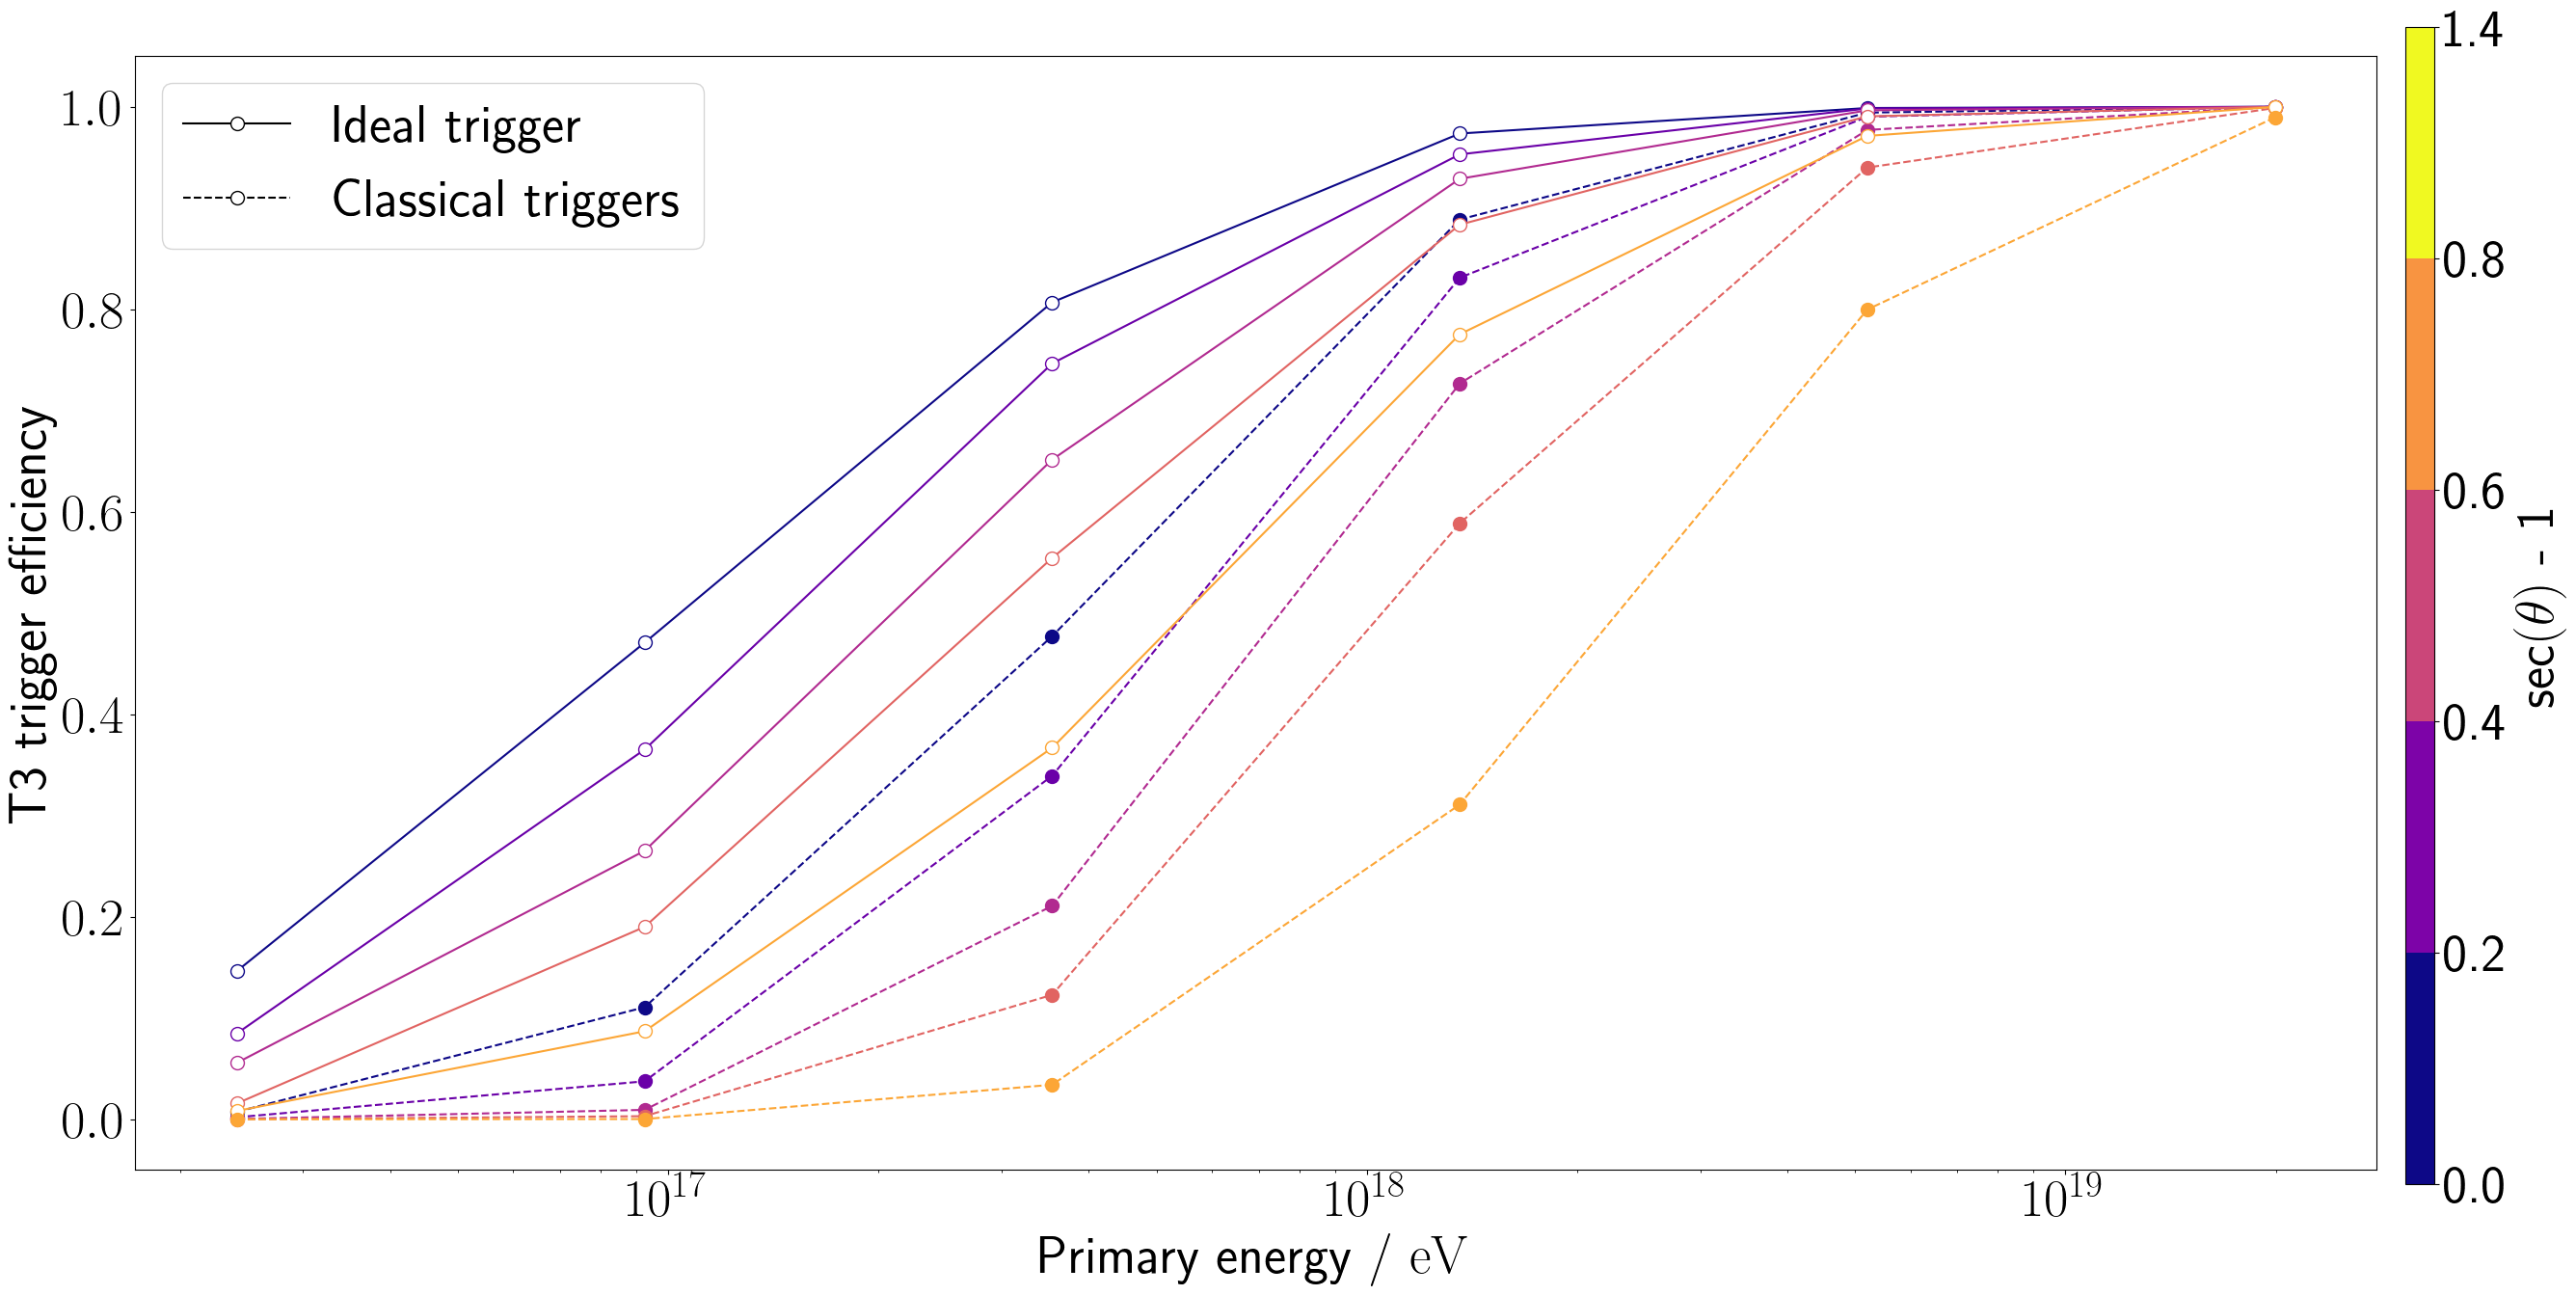

In [16]:
# bin_mock, eff_mock = Mock.do_t3_simulation(1e6)
# bin_trig, eff_trig = Trigger.do_t3_simulation("final_all_triggers", 1e6)

fig = plt.figure()
colormap = cmap.get_cmap("plasma")

for t, (mock, trig) in enumerate(zip(eff_mock, eff_trig)):
    c = colormap(t / len(eff_mock))

    plt.errorbar(bin_mock, mock, c = c, fmt = "-o", markersize = 10, mfc = "w")
    plt.errorbar(bin_mock, trig, c = c, fmt = "--o", markersize = 10)

plt.errorbar([], [], c = "k", fmt = "-o", markersize = 10, mfc = "w", label = "Ideal trigger")
plt.errorbar([], [], c = "k", fmt = "--o", markersize = 10, mfc = "w", label = "Classical triggers")
plt.xlabel("Primary energy / $\mathrm{eV}$")
plt.ylabel("T3 trigger efficiency")
plt.xscale("log")
plt.legend()

norm = BoundaryNorm([0.00, 33.56, 44.42, 51.32, 56.25, 65.37], colormap.N)
ax2 = fig.add_axes([0.91, 0.1, 0.01, 0.8])

cbar = ColorbarBase(ax2, cmap=colormap, norm=norm, label = r"sec$(\theta)$ - 1")
cbar.set_ticks([0.00, 33.56, 44.42, 51.32, 56.25, 65.37])
cbar.set_ticklabels(["0.0", "0.2", "0.4", "0.6", "0.8", "1.4"])